In [16]:
import numpy as np
def MapOverlap( a, b):
    Intersect = np.logical_and(a, b)
    Union=np.logical_or(a, b)
    return np.count_nonzero(Intersect)/np.count_nonzero(Union)

In [17]:
def MapHierach( a, b):
    I = np.count_nonzero(np.logical_and(a, b))
    A=np.count_nonzero(a)
    B=np.count_nonzero(b)
    return I/min([A,B])

In [18]:
from scipy.stats import entropy
def KL(a,b):
    return (entropy(a,b)+entropy(b,a))/2

In [19]:
import numpy as np
np.count_nonzero([1,-1])

2

In [20]:
from sklearn import metrics
def LayerOverlap(A,B):
    D=[]
    for i,a in enumerate(A):
        D.append([])
        print(i)
        for j,b in enumerate(B):
#             score=metrics.mutual_info_score(a,b)
            score=MapHierach(a,b)
#             score=KL(a,b)
            D[i].append(score)
    return D

In [13]:
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn import image
GLM=image.load_img('/home/share/TmpData/Qinglin/HCP_4mm_GLM/MOTOR/IC1_high.nii.gz')

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img,standardize=True)

masker.fit()
maps_GLM=masker.transform(GLM)
maps_GLM[maps_GLM<0]=0
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from pylab import figure
import os

def save_maps(components_img,dir):        
    if not os.path.exists(dir):
        os.makedirs(dir)
    components_img = masker.inverse_transform(components_img)
    for i, cur_img in enumerate(iter_img(components_img)):
        outname=dir+str(i)+'.png'
        plot_stat_map(cur_img, display_mode="z", title="ICN %d" % i,
                      cut_coords=1, colorbar=False,output_file=outname)

save_maps(maps_GLM,dir='/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_GLM/')        


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def plot(D,file):
    plt.figure()
    sns_plot=sns.clustermap(D,cmap="Reds")
    sns_plot.savefig(file)

In [21]:
map1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map1.npy')
map2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map2.npy')
map3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map3.npy')
D1=LayerOverlap(map1,maps_GLM)
D2=LayerOverlap(map2,maps_GLM)
D3=LayerOverlap(map3,maps_GLM)

plot(D1,)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<Figure size 432x288 with 0 Axes>

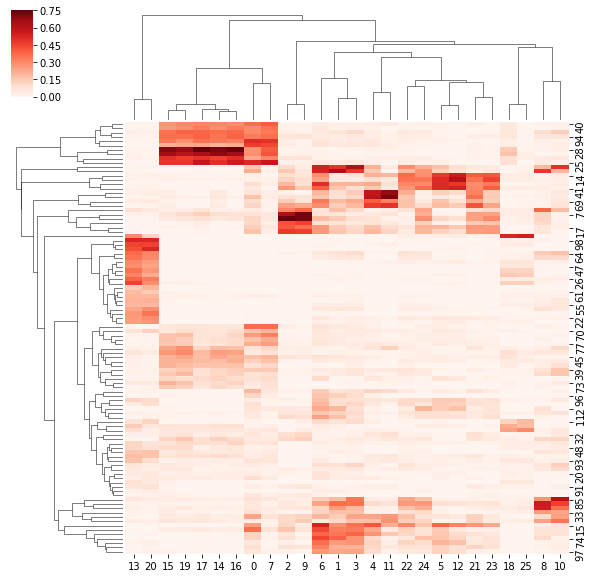

<Figure size 432x288 with 0 Axes>

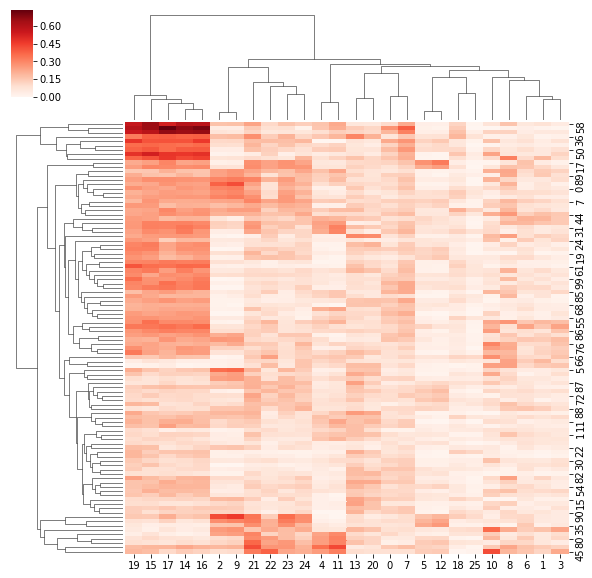

<Figure size 432x288 with 0 Axes>

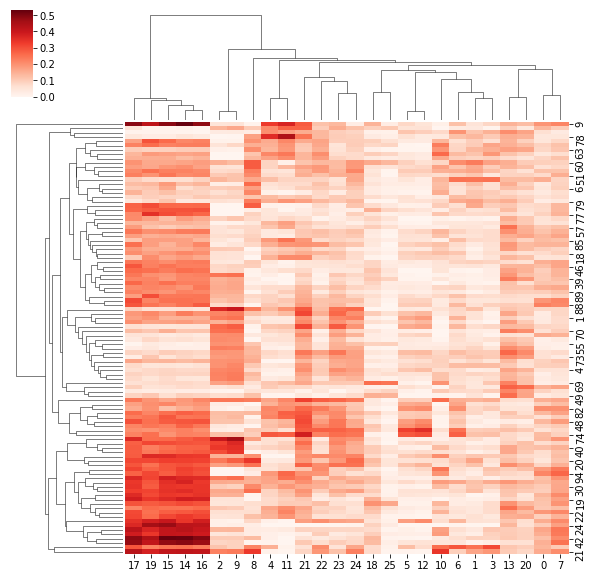

In [25]:


plt.figure()
sns_plot=sns.clustermap(D2,cmap="Reds")
plt.figure()
sns_plot=sns.clustermap(D3,cmap="Reds")